<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.





# Aproximación de la derivada mediante tres puntos.

## Para puntos medios.

\begin{equation}
f'(x_{0}) = \frac{1}{2h}[f(x_{0}+h)-f(x_{0}-h)] - \frac{h^{2}}{6}f^{3}(\xi_1)
\end{equation}

## Para puntos extremos.

\begin{equation}
f'(x_{0}) = \frac{1}{2h}[-3f(x_{0}) + 4f(x_{0}+h) - f(x_{0}+2h)] +
\frac{h^{2}}{3}f^{3}(\xi_{0})
\end{equation}

# Aproximación de la derivada mediante cinco puntos.

## Para puntos medios.

\begin{equation}
f'(x_{0}) = \frac{1}{12h}[f(x_{0}-2h) -8f(x_{0}-h) + 8f(x_{0}+h)
-f(x_{0}+2h)] + \frac{h^{4}}{30}f^{5}(\xi)
\end{equation}

## Para puntos extremos.


\begin{equation}
f'(x_{0}) = \frac{1}{12h}[-25f(x_{0}) +48f(x_{0}+h) -36f(x_{0}+2h)+16f(x_{0}+3h) -3f(x_{0}+4h)] + \frac{h^{4}}{5}f^{5}(\xi)
\end{equation}


## Comentarios.

Todas las anteriores formulas parten de una interpolación de lagrange para un función definida en un intervalo [a,b], es decir,
si $H = \left\{(x,y)\in R^{2}: (x_{0},y_{0}),....,(x_{n},y_{n})\right\}$
es el conjunto de los $n+1$ nodos donde se interpola la función $f$, y  $f\in C^{n+1}[a,b]$, entonces se tiene que:

\begin{equation}
f(x) = \sum_{k = 0 }^{n} f(x_{k})ℒ_{k}(x) + \frac{f^{n+1}(\xi(x))}{(n+1)!}∏_{j = 0}^{n}(x-x_{j})
\end{equation}
Si derivamos la anterior expresión llegamos a una expresión donde tenemos un problema con el error, puesto que no sabriamos que es $\frac{d}{dx}(f^{n+1}(\xi(x))$. Pero, dicha expresión desaparece gracias a la productoria si evaluamos en algun $x_{j}$ la función, por lo tanto simplemente podemos dar la cota de error para la aproximación de la derivada en los nodos.
Ahora, si se toman algunos nodos equispaciados, dependiendo de la cantidad de puntos que se emplee llegamos a las anteriores ecuaciones.

Cabe señalar que se dice puntos extremos y puntos medios, porque aquello depende de donde se tome el valor de $\xi$. En el caso de las formulas para puntos medios $\xi \in [x_{0}-h,x_{0}+h]$, en el caso de los extremos pertenece a todo el intervalo.


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import scipy.interpolate as sc

In [24]:
def integral_tapz_compuesta(f,a,b,n):
  h = (b-a) / n
  T1 = h / 2
  ## vamos a calcular 2 * \sum_{i = 1}^{n-1}f(x_{i})
  sum = 0
  for i in range(1,n-1,1):
    x_i = a + h*i
    val = f(x_i)
    sum = sum + val
  T2 = f(a) + f(b) + 2 * sum
  value = T1 * T2
  return value

def intervalo(a,b,n):
  h = (b-a)/n
  x_i = np.zeros(n)
  for i in range(n):
    x_i[i] = a + i * h
  return x_i

def par_impar(x):
  par = list()
  impar = list()
  for i in range(len(x)):
    if i%2 == 0:
      par.append(x[i])
    else:
      impar.append(x[i])
  par,impar = np.array(par),np.array(impar)
  return par,impar

def simpson_comp(f,a,b,n):
  sum_1 = 0
  sum_2 = 0
  if n%2 !=0:
    N = n + 1
  else:
    N = n
  x_i = intervalo(a,b,N)
  par,impar = par_impar(x_i)
  h = (b-a)/N
  for i in range(1,int((N/2)-1),1): ## realizar la sumatorias manualmente con un ciclo for.
    sum_1 = sum_1 + f(par[i])
  for i in range(1,int(N/2),1):
    sum_2 = sum_2 + f(impar[i])
  T1 = h/3
  T2 = f(a) + f(b) + 4 * sum_2 + 2 * sum_1
  val = T1 * T2
  return val



In [3]:
## condiciones iniciales.
t  = np.array([1,1.01,1.02,1.03,1.04])
i = np.array([3.10,3.12,3.14,3.18,3.24])

pos = np.where(t == 1.01)
t[pos + np.array(1)]

array([[1.02]])

In [4]:
### Construcción del DataFrame con el tiempo y la corriente.
dicc = {"Tiempo":t,"Corriente":i}
df = pd.DataFrame(dicc)
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [5]:
x_ = np.array([1.8,1.9,2.0,2.1,2.2,2.3,2.4])
f = lambda x : x * np.exp(x)
y_ = np.array([10.889365,12.703199,14.778112,17.148957,19.855030,f(2.3),f(2.4)])




In [6]:
### Calculo de la derivada para hallar el voltaje.
### Considerando lo anterior, vemos que los puntos estan equispaciados, es decir h = 0.1
### De ese modo emplearemos todas las formulas mencionadas anteriormente y compararemos los valores.

## Está función me permite calcular la derivada para tres puntos, dependiendo completamente de los puntos.
## Es decir, no se emplea una expresión matematica.
def tres_med_punt(x_,y_,x0):
  ## definimos el h, como se supone que están equipasciados los puntos, se toma para cualqueira dos puntos consecutivos.
  h = x_[1] - x_[0]
  pos = np.where(x_ == x0)
  ### Se determina la posición del elemento x0, en la lista x_
  pos_sig = pos + np.array(1)
  pos_ant = pos - np.array(1)
  ## las posiciones siguientes y anteriores.

  T1 = 1 / (2 * h)
  T2 = y_[pos_sig] - y_[pos_ant]
  val = T1 * T2
  return val

## Esta función calcula la derviada pero usando explicitamente una función respecto al punto x0.

def tres_med_f(x_,f,x0):
  ## definimos el h, como se supone que están equipasciados los puntos, se toma para cualqueira dos puntos consecutivos.
  h = x_[1] - x_[0]
  pos = np.where(x_ == x0)
  ### Se determina la posición del elemento x0, en la lista x_
  pos_sig = pos + np.array(1)
  pos_ant = pos - np.array(1)
  ## las posiciones siguientes y anteriores.

  T1 = 1 / (2 * h)
  T2 = f(x_[pos_sig]) - f(x_[pos_ant])
  val = T1 * T2
  return val

## Las siguientes funciones hace lo mismo que las anteriores.

def tres_ext_punt(x_,y_,x0):
  h = x_[1] - x_[0]
  pos = np.where(x_ == x0)
  pos_sig = pos + np.array(1)
  pos_2sig = pos + np.array(2)

  T1 = 1 / (2 * h)
  T2 = -3 * y_[pos] + 4 * y_[pos_sig] - y_[pos_2sig]
  val = T1 * T2
  return val

def tres_ext_f(x_,f,x0):
  h = x_[1] - x_[0]
  pos = np.where(x_ == x0)
  pos_sig = pos + np.array(1)
  pos_2sig = pos + np.array(2)

  T1 = 1 / (2 * h)
  T2 = -3 * f(x_[pos]) + 4 * f(x_[pos_sig]) - f(x_[pos_2sig])
  val = T1 * T2
  return val



In [7]:
## Aquí se define bajo el mismo racionamiento anterior de indicar la posición de la función, y los puntos anteriores o siguientes
## pero usando la ecuación de cinco puntos.
def cinco_med_punt(x_,y_,x0):
  h = x_[1] - x_[0]
  pos = np.where(x_ == x0)
  pos_2ant = pos - np.array(2)
  pos_ant = pos - np.array(1)
  pos_sig = pos + np.array(1)
  pos_2sig = pos + np.array(2)
  T1 = 1 / (12 * h)
  T2 = y_[pos_2ant] -8 * y_[pos_ant] + 8 * y_[pos_sig] - y_[pos_2sig]
  val = T1*T2
  return val

def cinco_med_f(x_,f,x0):
  h = x_[1] - x_[0]
  pos = np.where(x_ == x0)
  pos_2ant = pos - np.array(2)
  pos_ant = pos - np.array(1)
  pos_sig = pos + np.array(1)
  pos_2sig = pos + np.array(2)
  T1 = 1 / (12 * h)
  T2 = f(x_[pos_2ant]) -8 * f(x_[pos_ant]) + 8 * f(x_[pos_sig]) - f(x_[pos_2sig])
  val = T1*T2
  return val

def cinco_ext_punt(x_,y_,x0):
  h = x_[1] - x_[0]

  pos = np.where(x_ == x0)
  pos_sig = pos + np.array(1)
  pos_2sig = pos + np.array(2)
  pos_3sig = pos + np.array(3)
  pos_4sig = pos + np.array(4)

  T1 = 1 / (12 * h)
  T2 = -25 * y_[pos] + 48 * y_[pos_sig] - 36 * y_[pos_2sig] + 16 * y_[pos_3sig] - 3 * y_[pos_4sig]
  val = T1 * T2
  return val

def cinco_ext_f(x_,f,x0):
  h = x_[1] - x_[0]

  pos = np.where(x_ == x0)
  pos_sig = pos + np.array(1)
  pos_2sig = pos + np.array(2)
  pos_3sig = pos + np.array(3)
  pos_4sig = pos + np.array(4)

  T1 = 1 / (12 * h)
  T2 = -25 * f(x_[pos]) + 48 * f(x_[pos_sig]) - 36 * f(x_[pos_2sig]) + 16 * f(x_[pos_3sig]) - 3 * f(x_[pos_4sig])
  val = T1 * T2
  return val



In [8]:
derivative = np.zeros(len(i))
for j in range(len(derivative)-1):
  derivative[j] = tres_med_punt(t,i,t[j])
derivative[-1] = (i[-1] - i[-2])/(0.01)
## en este último punto donde no se puede calcular mediante las formulas descritas anteriormente,
## se coloca la derivada por la aproximación para dos puntos.
df["Derivada"] = derivative
df

,Tiempo,Corriente,Derivada
0,1.00,3.10,-6.0
1,1.01,3.12,2.0
2,1.02,3.14,3.0
3,1.03,3.18,5.0
4,1.04,3.24,6.0


<Figure size 640x480 with 0 Axes>

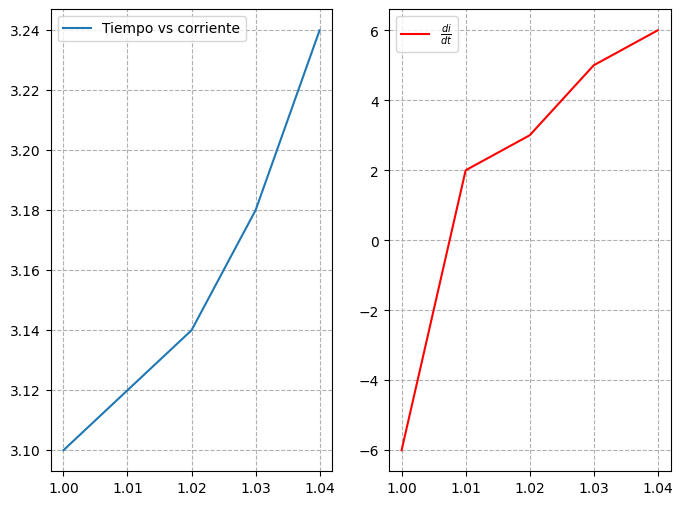

In [9]:
plt.figure()
fig, ax = plt.subplots(1,2,figsize = (8,6))
ax[0].plot(t,i,label = "Tiempo vs corriente")
ax[0].grid(True, ls = "dashed")
ax[0].legend()
ax[1].plot(df.Tiempo,df.Derivada,label = r"$\frac{di}{dt}$", color = "red")
ax[1].legend()
ax[1].grid(True, ls = "dashed")
plt.show()




# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!--
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


-

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

# Regla del trapecio compuesta.
\begin{equation}
\int_{a}^{b}f(x) \approx \frac{h}{2}[f(x_{0})+f(x_{n}) + 2\sum_{i = 1}^{n-1}f(x_{i})]
\end{equation}
La deducción se encuentra en la actividad 8

# Regla de simpson compuesta.
\begin{equation}
\int_{a}^{b}f(x) \approx \frac{h}{3}[f(x_{0}) + 4\sum_{i = 1}^{\frac{n}{2}}f(x_{2i}) + 2\sum_{i = 1}^{\frac{n}{2}-1}f(x_{2i}) + f(x_{n})]
\end{equation}

# Regla de cuadratura Gaussiana.
\begin{equation}
\int_{a}^{b}f(x)dx = \frac{b-a}{2}\sum_{i=1}^{n} w_{i}f(\frac{b-a}{2}y_{i} + \frac{b+a}{2}) + (\frac{b-a}{2})^{2n+1}
\end{equation}

Como se indicó en clase, para resolver una integral por cuadratura Gaussiana únicamente se hará usando la librería scipy.integrate.quad

In [26]:
## Primera integral.
g = lambda x : 1 / np.sqrt(np.tan(x))


N = 5000000
np.tan(0)
epsilon10 = 1e-9

## Método 1.
print("El valor de la integral mediante la regla del trapecio sería:",integral_tapz_compuesta(g,0+epsilon10,np.pi/2,N))

## Método 2.
print("El valor de la integral mediante la regla de simpson compuesta sería:",simpson_comp(g,0+epsilon10,np.pi/2,N))

## Método 3.
print("El valor de la integral mediante la regla de cuadratura Gaussiana sería:",integrate.quad(g,0,np.pi/2)[0])


El valor de la integral mediante la regla del trapecio sería: 2.225587908026413
El valor de la integral mediante la regla de simpson compuesta sería: 2.223298785918411
El valor de la integral mediante la regla de cuadratura Gaussiana sería: 2.2214414690792026


In [42]:
## Segunda integral.

g2 = lambda x : 1 / (1 + x**2)

ep = 1e-14

print("El valor de la integral mediante la regla de cuadratura Gaussiana sería:",integrate.quad(g2,-np.inf,np.inf))

El valor de la integral mediante la regla de cuadratura Gaussiana sería: (3.141592653589793, 5.155583041103855e-10)


In [29]:
## Tercera integral
x1 = np.linspace(0,np.pi/4,100)
valores3 = np.zeros(len(x1))
funct2 = lambda y,x0 : 2*y * np.sin(x0) + (np.cos(x0))**2

def fun_integrate(x0,fy):
  funct3 = lambda y : fy(y,x0 = x0)
  integral = integrate.quad(funct3,np.sin(x0),np.cos(x0))
  return integral[0]

for j in range(len(valores3)):
  valores3[j] = fun_integrate(x1[j],funct2)

## Primer método.
print("Empleando la regla del trapecio:",integrate.trapezoid(valores3,x1))

## Segundo método.

print("Emplenado el método de simpson:",integrate.simpson(valores3,x1))

## Tercer método.


## Realizandolo mediante una interpolación.

funct30 = sc.CubicSpline(x1,valores3)


print("Interpolando y evaluando la integral con cuadraturas Gaussianas:",integrate.quad(funct30,0,np.pi/4)[0])

Empleando la regla del trapecio: 0.5118335093392186
Emplenado el método de simpson: 0.5118446374265215
Interpolando y evaluando la integral con cuadraturas Gaussianas: 0.5118446352467922


5. Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto 5.

In [13]:
### condiciones iniciales.

### Vamos a suponer que tenemos una varilla de masa 2 kg, y longitud 0.3 m.

m = 2
b = 0.3
I0 = (1/12)*m*b**2
theta = np.arange(5,65,5)
theta = np.deg2rad(theta)
print(theta[2])

0.2617993877991494


In [124]:
## Está función me indica el periodo para pequeñas oscilaciones de un pendulo con una longitud b.
## Y momento de inercia I0.
def P0(I0,m,b):
  g = 9.8 ## [m/s^{2}]
  T1 = 2 * np.pi
  T2 = np.sqrt(I0/(m*g*b))
  val = T1 * T2
  return val

P0 = P0(I0,m,b)

def sin(x,theta0):
  T1 = np.sin(x/2)
  T2 = np.sin(theta0/2)
  val = T1/T2
  return val

def k(theta0):
  val = np.sin(theta0/2)
  return val

def funct(x,theta0,P0):
  T1 = (2 * P0) / np.pi
  T2 = np.sqrt( 1 - (k(theta0))**2 * (sin(x,theta0))**2)
  val = T1 * (1/T2)
  return val

def sol_an(m):
  m1 = 1 - m
  epsilon = 3e-5
  a0 = 1.3862944
  a1 = 0.1119723
  a2 = 0.00725296
  b0 = 0.5
  b1 = 0.1213478
  b2 = 0.0288729
  T1 = a0
  T2 = a1*m1
  T3 = a2*m1
  T4 = b0 + b1 * m1 + b2* (m1**2)
  T5 = np.log(m1)
  val = T1 + T2 + T3 - T4 * T5 + epsilon
  return val



sol_an(k(theta[5])**2)

1.541824240264525

In [125]:
def funct(x,theta0,P0):
  T1 = (2 * P0) / np.pi
  T2 = np.sqrt( 1 - (k(theta0))**2 * (sin(x,theta0))**2)
  val = T1 * (1/T2)
  return val



\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

In [126]:
f1 = lambda fi, theta0: 1/np.sqrt(1-np.sin(theta0/2)**2* (np.sin(fi))**2)
f_ = lambda fi : f1(fi,theta0 = theta[j])
integral_tapz_compuesta(f_,0,np.pi/2,50000)

1.6857140788253164

In [127]:
value3 = np.zeros(len(theta))
value = np.zeros(len(theta))
value2 = np.zeros(len(theta))
for j in range(len(value)):
  val2 = 2*P0/(np.pi)*integrate.quad(f1,0,np.pi/2, args = theta[j])[0]
  value[j] = val2
  value2[j] =   ((2 * P0) / np.pi)*sol_an( k(theta[j])**2 )

 # value3[j] = integral_tapz_compuesta(f_i,0,np.pi/2,400)


In [128]:
value3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<Figure size 1000x800 with 0 Axes>

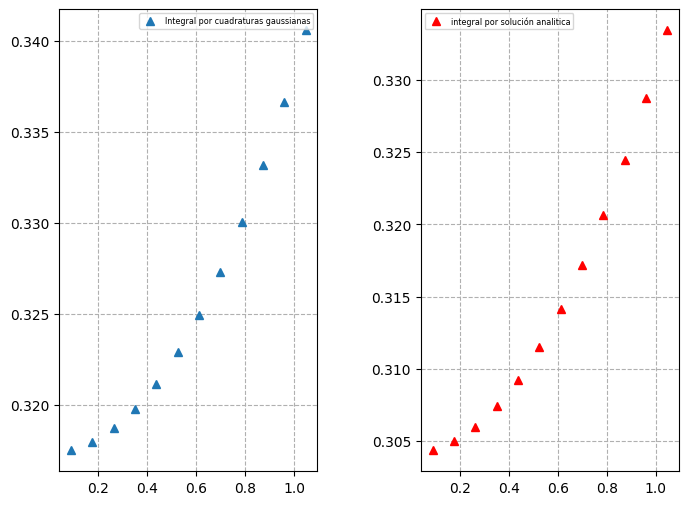

In [129]:

plt.figure(figsize = (10,8))
fig, axs = plt.subplots(1,2,figsize = (8,6))
axs[0].plot(theta,value,"^",label = "Integral por cuadraturas gaussianas")
axs[0].grid(True, ls = "dashed")
axs[0].legend(fontsize = "xx-small")
axs[1].plot(theta,value2,"^",label = "integral por solución analitica", color = "red")
axs[1].legend(loc = "upper left",fontsize = "xx-small")
axs[1].grid(True, ls = "dashed")

plt.subplots_adjust(wspace = 0.4)
plt.show()

5. (No se resulve)The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}



$m_1 = 1-m$,

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->

In [134]:
def k2(a,r,theta):
  T1 = 4*a*r*np.sin(theta)
  T2 = a**2 + r**2 + 2 * a * r * np.sin(theta)
  val = np.sqrt(T1 / T2)
  return val

K = lambda fi,k : 1 / np.sqrt(1 - k**2*(np.sin(fi))**2)

E = lambda fi,k : np.sqrt(1 - k ** 2 * (np.sin(fi))**2)

def A(r,theta,a,I,K,E,k2):
 m0 = 4*np.pi

 ### Los terminos de la expresión

 T1 = m0 / (4 * np.pi)
 T2 = 4*I*a
 T3 =  np.sqrt(a**2 + r**2+ 2 * a * r * np.sin(theta))
 K_ = integrate.quad(K,0,np.pi/2, args = k2(a,r,theta))
 E_ = integrate.quad(E,0,np.pi/2,args = k2(a,r,theta))
 T4 = (2 - (k2(a,r,theta))**2) * K_[0] - 2 * E_[0]
 T5 = k2(a,r,theta) ** 2
 exp = T1 * (T2/T3) * (T4/T5)
 return exp

In [155]:
### Condiciones iniciales.


a,I,r,theta34 = 1,3,1.1,np.pi/3

r2 = np.linspace(1,2,100)

valores10 = np.zeros(len(theta))
valores11 = np.zeros(len(r2))

for j in range(len(valores10)):
  valores10[j] = A(r,theta[j],a,I,K,E,k2)

for q in range(len(valores11)):
  valores11[q] = A(r2[q],theta34,a,I,K,E,k2)




<Figure size 640x480 with 0 Axes>

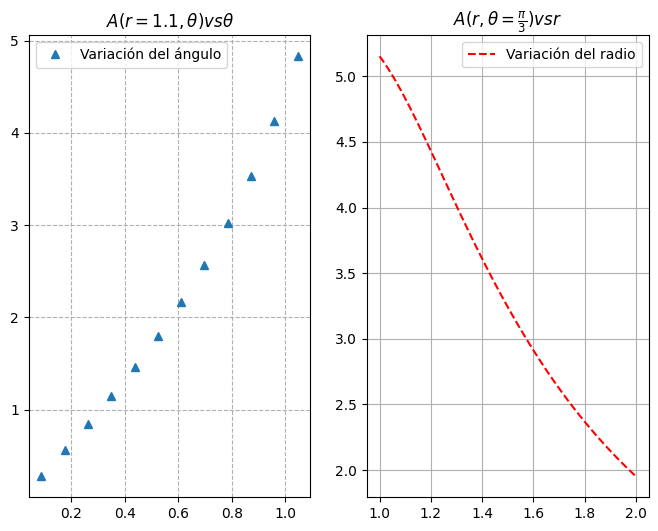

In [165]:
plt.figure()
fig,ax = plt.subplots(1,2,figsize = (8,6))
ax[0].plot(theta,valores10,"^", label = "Variación del ángulo")
ax[0].set_title(r"$A(r = 1.1,\theta) vs \theta$")
ax[0].grid(True, ls = "dashed")
ax[0].legend()
ax[1].plot(r2,valores11, "--",color = "red", label = "Variación del radio")
ax[1].set_title(r"$A(r ,\theta = \frac{\pi}{3}) vs r$")
ax[1].grid(True)
ax[1].legend()
plt.show()


7 (No se resulve)Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large